## Extract FLASH Data in yt
Mirielle Wong

6/21/24

Use yt's covering_grid class to extract data from FLASH.

In [1]:
# https://yt-project.org/

import yt
import numpy as np
import matplotlib.pyplot as plt

from datetime import datetime

import sys
sys.path.append('../src')

In [2]:
# plot_path = "./OSIRIS_transfer/MAGOFF/MagShockZ_hdf5_plt_cnt_0004"
plot_path = "./OSIRIS_transfer/MAGON/MagShockZ_hdf5_chk_0005"

In [3]:
ds = yt.load(plot_path)
list(ds.fields.flash)

yt : [INFO     ] 2024-07-22 15:18:53,992 Particle file found: MagShockZ_hdf5_chk_0005
yt : [INFO     ] 2024-07-22 15:18:54,028 Parameters: current_time              = 1.8520020414484505e-09
yt : [INFO     ] 2024-07-22 15:18:54,029 Parameters: domain_dimensions         = [288 272 288]
yt : [INFO     ] 2024-07-22 15:18:54,029 Parameters: domain_left_edge          = [-0.6   -0.075 -0.6  ]
yt : [INFO     ] 2024-07-22 15:18:54,030 Parameters: domain_right_edge         = [0.6 1.  0.6]
yt : [INFO     ] 2024-07-22 15:18:54,031 Parameters: cosmological_simulation   = 0


[On-Disk Field ('flash', 'absr'): (units: '', display_name: 'Absorption Coefficient'),
 On-Disk Field ('flash', 'cham'): (units: '', display_name: 'Chamber Material Fraction'),
 On-Disk Field ('flash', 'cond'): (units: '', display_name: 'Conductivity'),
 On-Disk Field ('flash', 'dbgs'): (units: '', display_name: 'Debug for Shocks'),
 On-Disk Field ('flash', 'dens'): (units: 'code_mass/code_length**3'),
 On-Disk Field ('flash', 'depo'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'dfcf'): (units: '', display_name: 'Diffusion Equation Scalar'),
 On-Disk Field ('flash', 'divb'): (units: 'code_magnetic/code_length'),
 On-Disk Field ('flash', 'eele'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Electron Internal Specific Energy'),
 On-Disk Field ('flash', 'eint'): (units: 'code_length**2/code_time**2'),
 On-Disk Field ('flash', 'eion'): (units: 'code_mass * (code_length/code_time)**2', display_name: 'Ion Internal Specific Energy'),
 On-Disk Field ('

In [4]:
print(ds.domain_dimensions)
domain_left_edge = [-0.6, -0.075, -0.6]    # from info printed in yt.load

[288 272 288]


In [5]:
# this is from the yt documentation

level = 2
dims = ds.domain_dimensions * ds.refine_by**level

# We construct an object that describes the data region and structure we want
# In this case, we want all data up to the maximum "level" of refinement
# across the entire simulation volume.  Higher levels than this will not
# contribute to our covering grid.
all_data = ds.covering_grid(
    level,
    left_edge=domain_left_edge,
    dims=dims,
    # And any fields to preload (this is optional!)
)

In [6]:
# relevant vars

print(ds.units)
print(ds.length_unit)
print(ds.mass_unit)
print(dims)
print(ds.domain_dimensions)
print(ds.refine_by)

1.0 cm
1.0 g
[1152 1088 1152]
[288 272 288]
2


In [7]:
data_level0 = ds.covering_grid(
    1,
    left_edge = domain_left_edge,
    dims = ds.domain_dimensions
)

yt : [INFO     ] 2024-07-22 15:18:55,369 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-22 15:18:55,369 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-22 15:18:55,371 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-22 15:18:55,372 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-22 15:18:55,373 Making a fixed resolution buffer of (('flash', 'magx')) 800 by 800



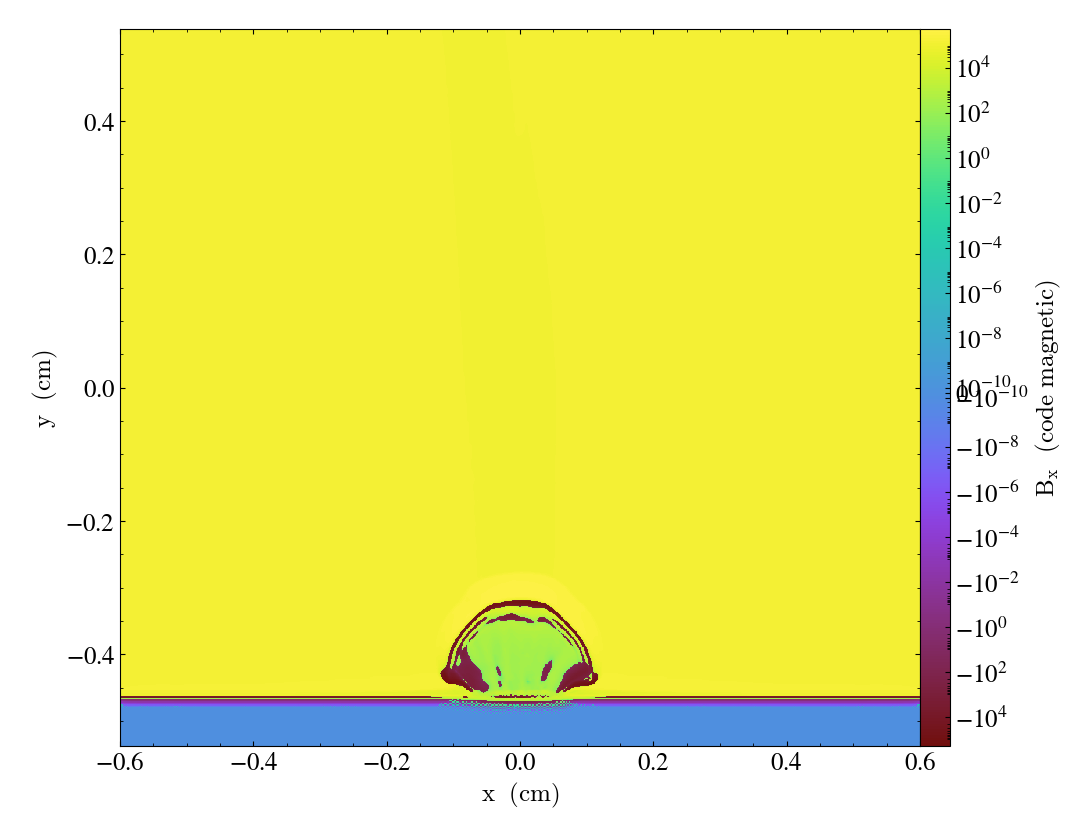

In [8]:
slc = yt.SlicePlot(ds,"z",("magx"))
slc

yt : [INFO     ] 2024-07-22 15:18:56,092 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-22 15:18:56,093 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-22 15:18:56,096 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-22 15:18:56,096 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-22 15:18:56,098 Making a fixed resolution buffer of (('flash', 'vely')) 800 by 800


vely at [0.   0.09 0.  ] code_length: [87570475.64419766] code_length/code_time



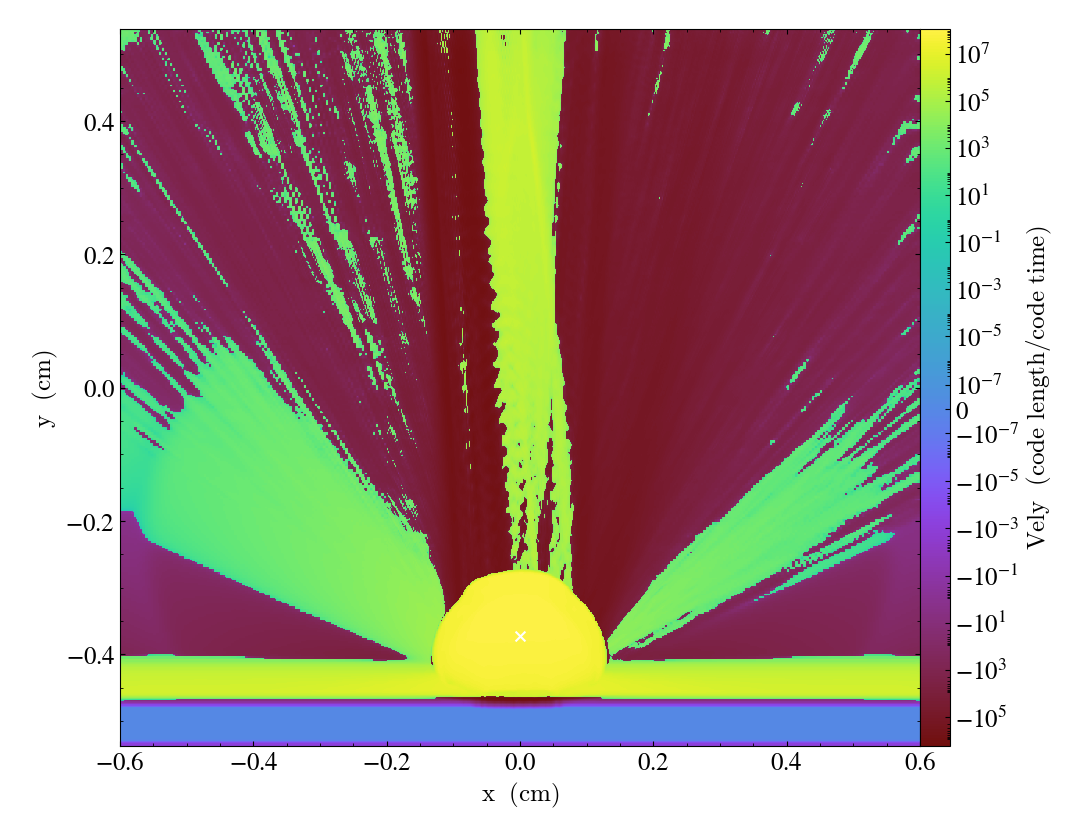

In [9]:
def pull_value_at_coord(x, y, z, field):
    slc = yt.SlicePlot(ds,"z",(field))
    
    # Convert coordinates to dataset units
    coord = ds.arr([x, y, z], 'code_length')

    # Extract the value at the specific coordinates
    value = ds.find_field_values_at_point(fields=('flash',field), coords=coord)
    print(f"{field} at {coord}: {value}")

    slc.annotate_marker(coord)
    return slc

slc_new = pull_value_at_coord(0.0,0.09,0.0,'vely')
slc_new


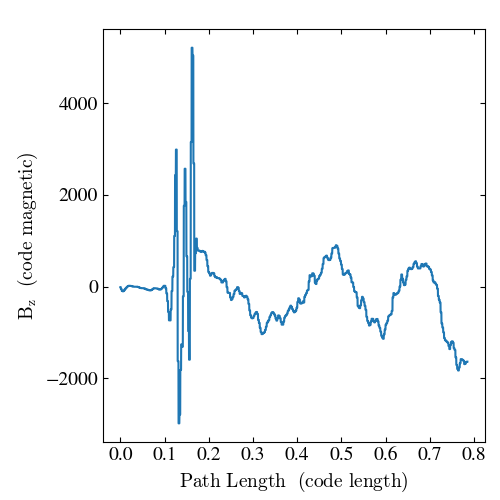

In [10]:
plot = yt.LinePlot(ds, [("flash", "magz")], (0, 0.015, 0), (0, .8, 0), 50000)
plot.set_log(("flash", "magz"),log = False)
plot


[[Model]]
    Model(model)
[[Fit Statistics]]
    # fitting method   = leastsq
    # function evals   = 55
    # data points      = 128
    # variables        = 3
    chi-square         = 0.00954752
    reduced chi-square = 7.6380e-05
    Akaike info crit   = -1210.44857
    Bayesian info crit = -1201.89248
    R-squared          = 0.92315572
[[Variables]]
    A:      0.20652465 +/- 0.00570114 (2.76%) (init = 0.01)
    alpha:  161.847749 +/- 8.50757080 (5.26%) (init = 1)
    C:     -8.7299e-05 +/- 8.1360e-04 (931.97%) (init = 0)
[[Correlations]] (unreported correlations are < 0.100)
    C(A, alpha) = +0.3552
    C(alpha, C) = +0.2276
    C(A, C)     = -0.1212


Text(0.5, 1.0, 'exponential fit of density profile')

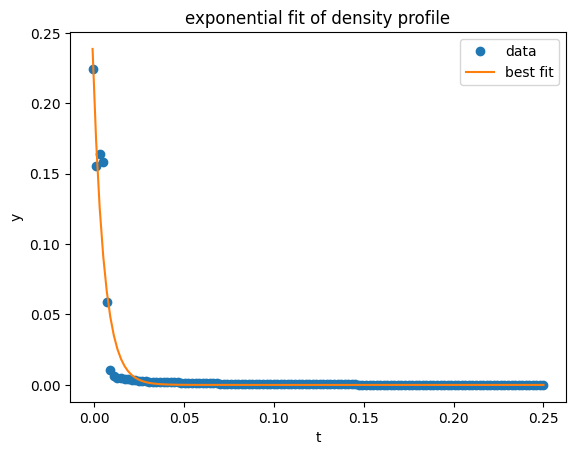

In [11]:
ray = ds.ray((0, 0.00, 0), (0, .25, 0))

dens = np.array(ray[('flash','dens')])
y = np.array(ray[('flash','y')])

from lmfit import Model

def model(t, A, alpha, C):
    return A * np.exp(-alpha * t) + C

# Create a model
exp_model = Model(model)

# Initial guess for the parameters
params = exp_model.make_params(A=0.01, alpha=1.0, B=0.0, beta=0.1, C=0.0, t0 = 0.15)

# Perform the fit
result = exp_model.fit(dens, params, t=y)

print(result.fit_report())

# Plot the data and the fitted curve
result.plot_fit()
plt.title('exponential fit of density profile')

In [12]:
print(f'A = {result.best_values["A"]} g/cm^3')
print(f'alpha = {result.best_values["alpha"]} cm^-1')
print(f'C = {result.best_values["C"]} g/cm^3')

A = 0.2065246519158426 g/cm^3
alpha = 161.84774948188502 cm^-1
C = -8.72993017053762e-05 g/cm^3


In [13]:
def make_ion_number_density(field, data):
    avogadro = 6.022e23
    ion_number_density = avogadro*data["flash","dens"]*data["flash","sumy"]
    return ion_number_density

def make_electron_number_density(field, data):
    avogadro = 6.022e23
    electron_number_density = avogadro*data["flash","dens"]*data["flash","ye"]
    return electron_number_density

ds.add_field(("flash", "idens"), function=make_ion_number_density, units="code_mass/code_length**3",sampling_type="cell") #technically the units are wrong here
ds.add_field(("flash", "edens"), function=make_electron_number_density, units="code_mass/code_length**3",sampling_type="cell") # same here

yt : [INFO     ] 2024-07-22 15:19:01,439 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-22 15:19:01,440 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-22 15:19:01,441 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-22 15:19:01,442 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-22 15:19:01,443 Making a fixed resolution buffer of (('flash', 'edens')) 800 by 800



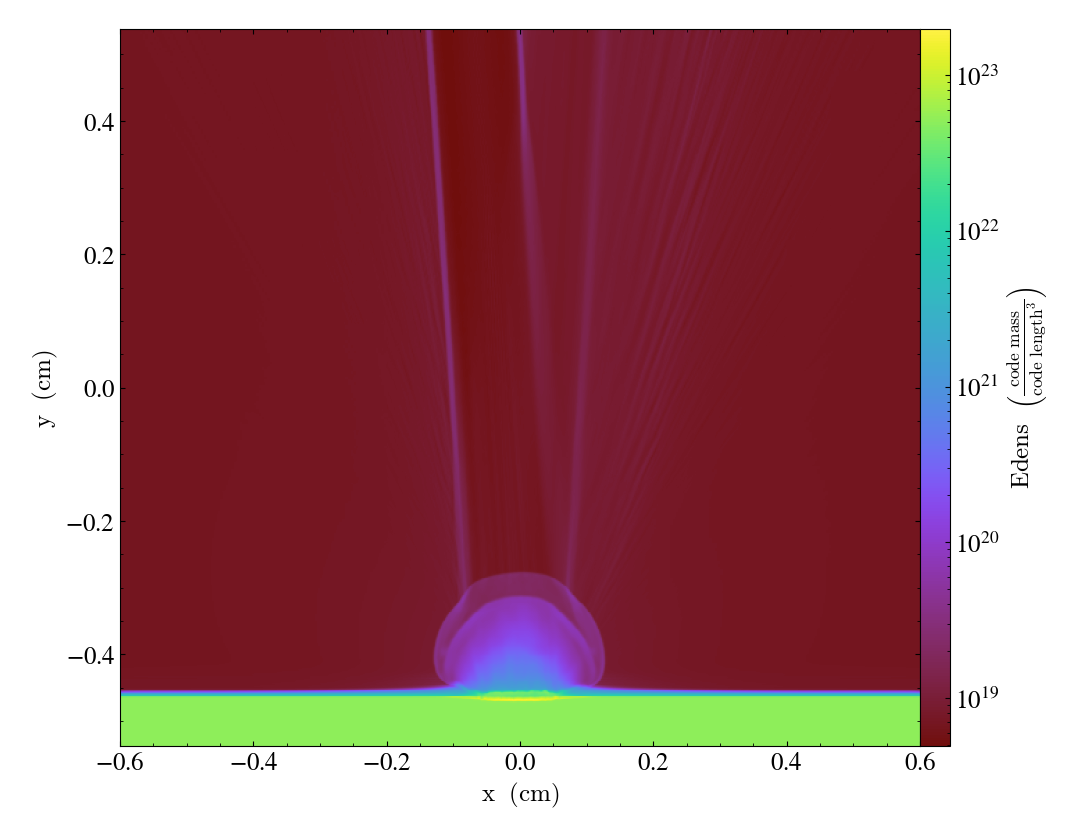

In [14]:
edens = yt.SlicePlot(ds,"z", ("flash", "edens"))
edens

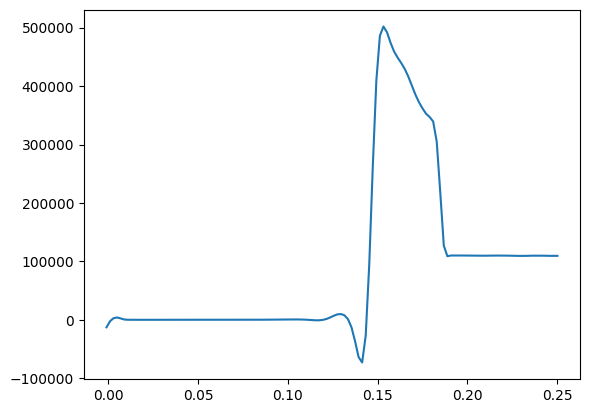

In [15]:
magx = np.array(ray[('flash','magx')])
plt.plot(y, magx)

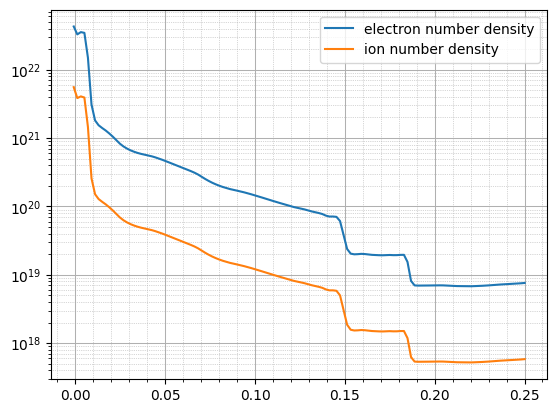

In [16]:
idens = np.array(ray[('flash','idens')])

edens = np.array(ray[('flash','edens')])
plt.semilogy(y, edens, label='electron number density')
plt.semilogy(y, idens, label='ion number density')
plt.legend()

from transform import pretty_plot
pretty_plot()

yt : [INFO     ] 2024-07-22 15:20:16,218 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-22 15:20:16,219 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-22 15:20:16,221 xlim = -0.600000 0.600000
yt : [INFO     ] 2024-07-22 15:20:16,222 ylim = -0.075000 1.000000
yt : [INFO     ] 2024-07-22 15:20:16,223 Making a fixed resolution buffer of (('flash', 'edens')) 800 by 800


edens at [0.5 0.6 0. ] code_length: [6.84508518e+18] code_mass/code_length**3



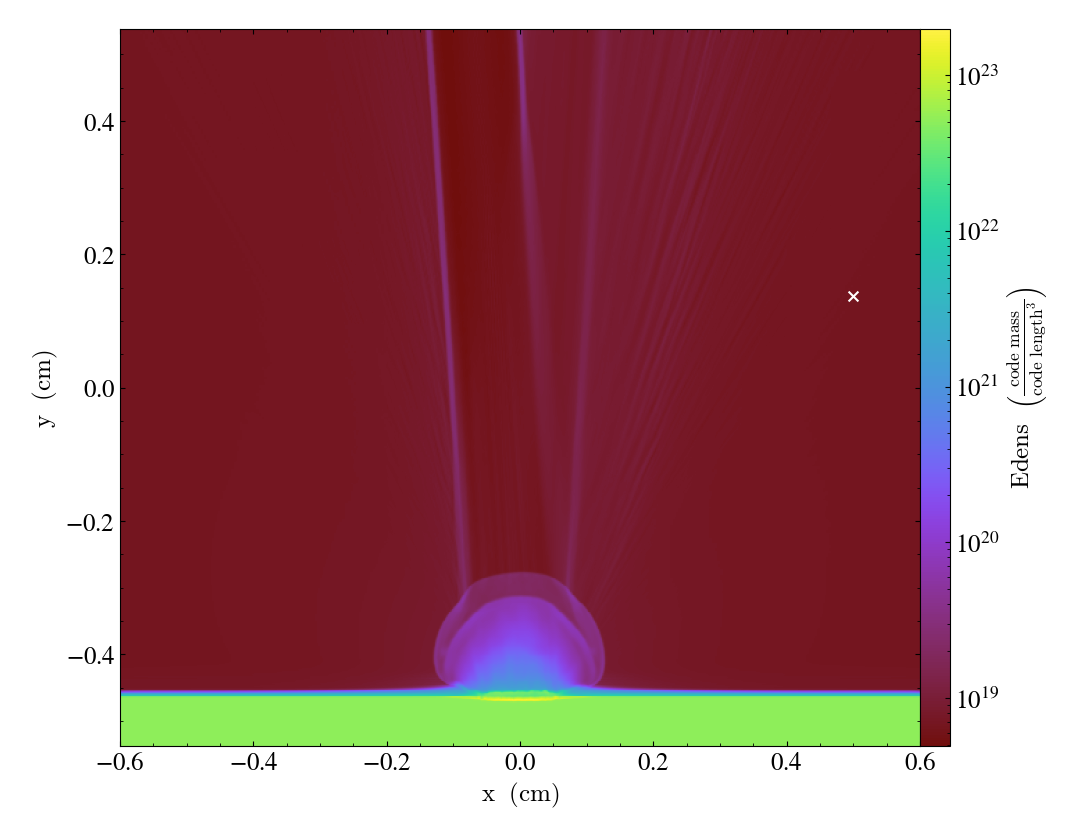

In [23]:
pull_value_at_coord(0.5,0.6,0.0,'edens')

Text(0.5, 0, 'y [cm]')

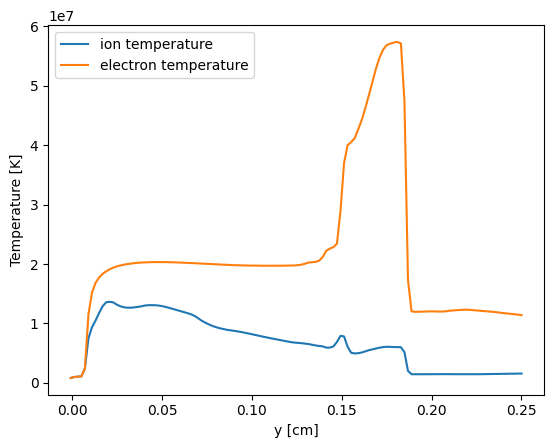

In [17]:
# list(ds.fields.flash)

tion = np.array(ray[('flash','tion')])
plt.plot(y, tion, label='ion temperature')

tele = np.array(ray[('flash','tele')])
plt.plot(y, tele, label='electron temperature')


plt.legend()
plt.ylabel('Temperature [K]')
plt.xlabel('y [cm]')
